<h1> Hypothesis T Test</h1>
<br> 1. single sample independent T-Test
<br> 2. Two sample T-Test
<br> 3. Two paired sample T-Test
<br><br><b> Used Method</b>
<br> Stats Module
<br> Confidence interval
<br> Bootstarpping

<h2> Single independent sample test

In [1]:
# Loading required libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import random

<b>Problem : </b> Statistically check voter age of paris is significantly different from France voters age
<br><b> Ho :</b> There is no difference in age of voters France_age = Paris_age
<br><b>Ha :</b> France_age != Paris_age

France average age : 52.726
Paris average age : 50.08


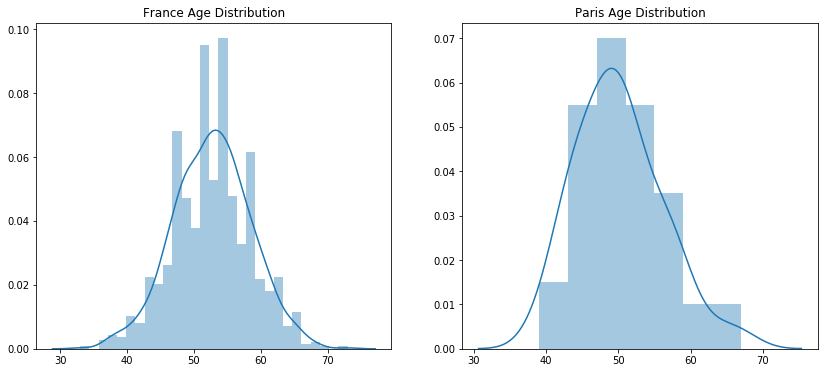

In [2]:
# Creating data for age 
np.random.seed(1)
france = stats.poisson.rvs(loc = 18 ,mu = 35, size = 1000)
france_mean = france.mean()
print('France average age :',france_mean)

n= 50
paris = stats.poisson.rvs(loc = 18 ,mu = 32, size = n)
paris_mean = paris.mean()
print('Paris average age :',paris_mean)

fig, ax = plt.subplots(1,2,figsize = (14,6))
sns.distplot(france,ax = ax[0])
sns.distplot(paris,ax = ax[1])
ax[0].set_title('France Age Distribution')
ax[1].set_title('Paris Age Distribution')
plt.show() 

<h3> Using 1 sample independent  T test from stats module

In [3]:
# Statistically check voter age of paris is significantly different from France voters age
# H0 : There is no difference in age France_age = Paris_age
# Ha : France_age != Paris_age
# checking for confidence of 95%

# T test
result = stats.ttest_1samp(a = paris ,popmean =france_mean)

# --- Conclusion based on p_value ----#
# p_value > alpha ( failed to reject numm hypothesis)
# p_value < alpha ( reject null hypothesis)

p_value = result.pvalue
alpha = 0.05 

print('----------- Result based on P Value ---------')
print('P_value :', p_value)
print('alpha :', alpha)
print ('Conclusion : Fail to reject H0' if p_value > alpha else 'Conclusion : Reject H0')


# ---- Conclusion based on statistics -----#

# if this statistics is not inside in the quantile of data then we can reject null hypothesis based else not
quantile = .025 # for making conclusion based on statistics generated in one sample t test 
freedom = n-1 # degree of freedom

stat = result.statistic
quantile_value = stats.t.ppf(q= quantile ,df= freedom)

# test statistics out of quantile of data So we can reject null hypothesis

print('----------- Result based on statistics Value ---------')
print('Statistics from T test :', stat)
print('Quantile value for valid statistics :',quantile_value )
print ('Conclusion : Fail to reject H0' if stat > quantile_value else 'Conclusion : Reject H0')

----------- Result based on P Value ---------
P_value : 0.003055386387742948
alpha : 0.05
Conclusion : Reject H0
----------- Result based on statistics Value ---------
Statistics from T test : -3.116857040611263
Quantile value for valid statistics : -2.0095752344892093
Conclusion : Reject H0


<h3> Test using confidence interval

In [4]:
t_critical = stats.t.ppf(.975, df = n-1) # when population deviation is unknown ( use sample std in calculating error)
paris_std = paris.std()
std_error = paris_std / np.sqrt(n) 

t_error = t_critical * std_error

low = paris_mean - t_error
high = paris_mean + t_error

# Mean interval with 95% confidence interval
t_interval=(low,high) 

# France Average age doesn't lie in the confidence interval derived from Paris data
# From above it can concluded that they are not the same data

print('--------- Rseult based on confidence interval ---------')
print('France Average age :',france_mean)
print('Confidence interval :', t_interval)
print ('Conclusion : Fail to reject H0' if france_mean > low and france_mean < high  else 'Conclusion : Reject H0')

--------- Rseult based on confidence interval ---------
France Average age : 52.726
Confidence interval : (48.3911531642323, 51.7688468357677)
Conclusion : Reject H0


In [5]:
# Stats module to find interval
interval = stats.t.interval(alpha = 0.95,df = n-1, loc = paris_mean, scale = std_error)
print('Confidence interval :',interval)

Confidence interval : (48.3911531642323, 51.7688468357677)


<h3> Test using bootstrapping

In [6]:
# H0 is both data are same So we mix those two dataset and then divide into two groups

actual_gap = france_mean - paris_mean

mean_gaps = []
n_trials = 100000
for trial in range(n_trials):
    mix = np.concatenate((france,paris))
    mix = np.random.permutation(mix)
    
    paris_sample = mix[0:n]
    paris_sample_mean = paris_sample.mean()
    
    france_sample = mix[n:]
    france_sample_mean= france_sample.mean()
    
    sample_mean_gap = france_sample_mean - paris_sample_mean
    mean_gaps.append(sample_mean_gap)
    
large = [gap for gap in mean_gaps if gap > actual_gap]
p_value = len(large)/n_trials * 2

print('--------- Rseult based on confidence interval ---------')
print('P_value :', p_value)
print('alpha :', alpha)
print ('Conclusion : Fail to reject H0' if p_value > alpha else 'Conclusion : Reject H0')

--------- Rseult based on confidence interval ---------
P_value : 0.00186
alpha : 0.05
Conclusion : Reject H0


<2>Two sample T test

<b> Problem : </b> Is Paris and Lille have significant pattern difference in their voting population age 
<br><b>H0 :</b> paris = lille
<br><b> Ha : </b>paris != lille

In [7]:
n_paris = 3000
n_lille = 2000

np.random.seed(123)
paris = stats.poisson.rvs(loc = 18 ,mu = 32, size = n_paris)
paris_mean = paris.mean()
print('Paris average age :',paris_mean)

lille = stats.poisson.rvs(loc = 18 ,mu = 33, size = n_lille)
lille_mean = lille.mean()
print('Lille average age :',lille_mean)

actual_mean_diff = lille_mean - paris_mean
print('Mean difference of age :', actual_mean_diff)

Paris average age : 50.144333333333336
Lille average age : 50.6935
Mean difference of age : 0.5491666666666646


<h3> Using two sample test from stats module

In [8]:
# H0 : Both sample are identical 
# H0 : paris = lille
# Ha : paris != lille

alpha = 0.05
result = stats.ttest_ind(a = paris, b = lille, equal_var = False)

p_value = result.pvalue

print('----------- Result based on P Value ---------')
print('P_value :', p_value)
print('alpha :', alpha)
print ('Conclusion : fail to reject H0' if p_value > alpha else 'Conclusion : Reject H0')

----------- Result based on P Value ---------
P_value : 0.0008778217650521761
alpha : 0.05
Conclusion : Reject H0


<h3> Using bootstrapping

In [9]:
# H0 is both data are same So we mix those two dataset and then divide into two groups
mean_gaps = []
n_trials = 10000
for trial in range(n_trials):
    mix = np.concatenate((lille,paris))
    mix = np.random.permutation(mix)
    
    paris_sample = mix[0:n_paris]
    paris_sample_mean = paris_sample.mean()
    
    lille_sample = mix[n_paris:]
    lille_sample_mean = lille_sample.mean()
    
    mean_gaps.append(lille_sample_mean - paris_sample_mean)
    
large = [gap for gap in mean_gaps if gap > actual_mean_diff]
p_value = len(large)/n_trials * 2

print('--------- Rseult based on confidence interval ---------')
print('P_value :', p_value)
print('alpha :', alpha)
print ('Conclusion : Fail to reject H0' if p_value > alpha else 'Conclusion : Reject H0')

--------- Rseult based on confidence interval ---------
P_value : 0.0008
alpha : 0.05
Conclusion : Reject H0


<h2>Two Paired Samples

<b>Problem : </b>Is there any effect of weight loss drug on Customers ( Before & After)
<br><b> H0 :</b> Before mean  =  After mean
<br><b> Ha :</b> Before mean != After mean

   weight_before  weight_after  weight loss
0     302.483642    305.605006    -3.121364
1     241.417810    240.526071     0.891739
2     235.463046    226.017788     9.445258
3     170.400443    165.913930     4.486513
4     249.751461    252.590309    -2.838848


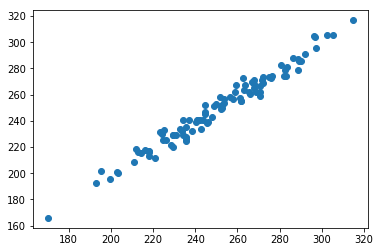

In [10]:
# Data 
np.random.seed(11)
n = 100
before = stats.norm.rvs(loc = 250, scale = 30, size = n) 
after = before + stats.norm.rvs(loc = -1.25, scale = 5, size = n) 

weight_df = pd.DataFrame({'weight_before':before,
                          'weight_after' :after,
                          'weight loss': before - after})
print(weight_df.head())

plt.scatter(weight_df['weight_before'],weight_df['weight_after'])
plt.show()

<h3> Using stats Module result

In [11]:
# This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values.
# H0 : Before =  After
# Ha : Before != After

alpha = 0.05

result = stats.ttest_rel(a= before, b = after)
p_value = result.pvalue

print('--------- Rseult based on stats rel test ---------')
print('P_value :', p_value)
print('alpha :', alpha)
print ('Conclusion : Fail to reject H0' if p_value > alpha else 'Conclusion : Reject H0')

--------- Rseult based on stats rel test ---------
P_value : 0.011596444318439859
alpha : 0.05
Conclusion : Reject H0


<h3> Using bootstrapping

In [12]:
actual_diff = before.mean() - after.mean()  
sample_diffs = []
n_trials = 100000

for trial in range(n_trials):
    pos = np.random.choice([0,1],size = n) 

    before_sample=[]
    after_sample = []
    for i in range(n):
        before_sample.append(before[i] if pos[i] == 0 else after[i])
        after_sample.append(after[i] if pos[i] == 0 else before[i])
    
    
    sample_diff = np.mean(before_sample) - np.mean(after_sample)
    sample_diffs.append(sample_diff)
    
    
large = [diff for diff in sample_diffs if diff > actual_diff]
p_value = len(large)/n_trials * 2

print('--------- Rseult based on Random walk ---------')
print('P_value :', p_value)
print('alpha :', alpha)
print ('Conclusion : Fail to reject H0' if p_value > alpha else 'Conclusion : Reject H0')


--------- Rseult based on Random walk ---------
P_value : 0.01152
alpha : 0.05
Conclusion : Reject H0
